# Laboratorio 4 - Regresión y Clustering

## Paula Hípola Gómez, José Ignacio Navas Sanz y Belén Ortega Pérez

## Entregable 2 - Características de los Inmuebles

In [1]:
%config IPCompleter.greedy=True
%reset
#Importamos las librerías necesarias
#Numpy
import numpy as np
#Pandas
import pandas as pd
#Scikit-Learn
import sklearn as sk
#Matplotlib
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA


Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
#Se utiliza para centrar imágenes
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [3]:
#Importamos el CSV
dataset = pd.read_csv('casas.csv')
#Guardamos una copia del dataset original
datasetOriginal = dataset
#Mostramos los datos
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


El atributo id no es útil en el estudio del precio de las casas ya que para nosotros significa el orden en el que los inmuebles se han añadido al conjunto de datos. Es por esto que procedemos a eliminarlo. Del mismo modo, el precio de las distintas casas es nuestra variable objetivo por lo que lo separamos del dataset.  Finalmente, obtendremos los 79 atributos que describen las casas de este conjunto de datos.

In [5]:
#Creamos el array con el precio de cada registro.
precioDeVenta = dataset["SalePrice"].values
#Eliminamos los atributos ID
dataset = dataset.drop(columns=['Id'])
dataset.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [6]:
#Miramos cuántos datos duplicados hay
numDuplicados = dataset.duplicated().sum()
print('Hay',numDuplicados,'valores duplicados')

Hay 0 valores duplicados


In [7]:
#Miramos cuántos datos nulos hay
columnasNulas = dataset.isnull().sum()
porcentajes = []
valores = []

#Calculamos el porcentaje de nulos
for col in columnasNulas:
    porcent = (col/dataset.shape[0])*100
    porcentajes.append(porcent)
    
dataFrameNulos = {'Nulos': columnasNulas, 'Porcentaje': porcentajes}
dataFrameNulos = pd.DataFrame(dataFrameNulos)
dataFrameNulos = dataFrameNulos.loc[dataFrameNulos['Nulos'] > 0]
dataFrameNulos

,Nulos,Porcentaje
LotFrontage,259,17.739726
Alley,1369,93.767123
MasVnrType,8,0.547945
MasVnrArea,8,0.547945
BsmtQual,37,2.534247
BsmtCond,37,2.534247
BsmtExposure,38,2.602740
BsmtFinType1,37,2.534247
BsmtFinType2,38,2.602740
Electrical,1,0.068493


En nuestra opinión, para calcular el precio de una casa, son importantes todos los atributos ya que cada valor que tome el inmueble en cada uno de ellos será el que diferencie el precio. Es por esto que hemos decidido cambiar el valor NaN de nuestro dataset por valores que no sean nulos para un mejor análisis del precio.
Además, hemos detectado que hay ciertas columnas que el valor NA implica NO. No es que sea un valor desconocido, es que las casas no tienen esas propiedades.

In [8]:
#En las columnas no numéricas, cambiamos los nulos por el valor 'No'
columnasNoNumericas = dataset.dtypes[dataset.dtypes == 'object']
columnasNoNumericas.index

#Hemos detectado que hay ciertas columnas que el NA implica NO por lo que pondremos ese valor realmente, 
#no es que sea desconocido, es que no tienen esa propiedad las casas

columnasNAesNo = ['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu',
                  'GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature',]

for col in columnasNAesNo:
    dataset[col] = dataset[col].fillna('No')

In [9]:
dataset

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,No,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,No,Reg,Lvl,AllPub,FR2,...,0,No,No,No,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,No,IR1,Lvl,AllPub,Inside,...,0,No,No,No,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,No,IR1,Lvl,AllPub,Corner,...,0,No,No,No,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,No,IR1,Lvl,AllPub,FR2,...,0,No,No,No,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,No,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,No,Reg,Lvl,AllPub,Inside,...,0,No,MnPrv,No,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,No,Reg,Lvl,AllPub,Inside,...,0,No,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,No,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,4,2010,WD,Normal,142125


In [10]:
#Actualizamos las columnas nulas
#Volvemos a comprobar cuántos valores nulos hay
columnasNulas = dataset.isnull().sum()
porcentajes = []
valores = []

#Calculamos el porcentaje de nulos
for col in columnasNulas:
    porcent = (col/dataset.shape[0])*100
    porcentajes.append(porcent)
    
dataFrameNulos = {'Nulos': columnasNulas, 'Porcentaje': porcentajes}
dataFrameNulos = pd.DataFrame(dataFrameNulos)
dataFrameNulos = dataFrameNulos.loc[dataFrameNulos['Nulos'] > 0]
dataFrameNulos

,Nulos,Porcentaje
LotFrontage,259,17.739726
MasVnrType,8,0.547945
MasVnrArea,8,0.547945
Electrical,1,0.068493
GarageYrBlt,81,5.547945


In [11]:
#En las columnas no numéricas, cambiamos los nulos por el valor 'Desconocido'
columnasNoNumericas = dataset.dtypes[dataset.dtypes == 'object']

for col in columnasNoNumericas.index:
    if(col in dataFrameNulos.index):
        dataset[col] = dataset[col].fillna('Desconocido')

In [12]:
#Actualizamos las columnas nulas
#Volvemos a comprobar cuántos valores nulos hay
columnasNulas = dataset.isnull().sum()
porcentajes = []
valores = []

#Calculamos el porcentaje de nulos
for col in columnasNulas:
    porcent = (col/dataset.shape[0])*100
    porcentajes.append(porcent)
    
dataFrameNulos = {'Nulos': columnasNulas, 'Porcentaje': porcentajes}
dataFrameNulos = pd.DataFrame(dataFrameNulos)
dataFrameNulos = dataFrameNulos.loc[dataFrameNulos['Nulos'] > 0]
dataFrameNulos

,Nulos,Porcentaje
LotFrontage,259,17.739726
MasVnrArea,8,0.547945
GarageYrBlt,81,5.547945


La columna GarageYrBlt con 81 nulos es resultante de casas sin garaje. Cambiaremos el valor nulo por un 0 ya que el atributo es de tipo <i>float64</i>

In [13]:
columnasNumericas = dataset.dtypes[dataset.dtypes == 'float']
columnasNumericas

dataset['GarageYrBlt'] = dataset.fillna(0)

In [14]:
#Actualizamos las columnas nulas
#Volvemos a comprobar cuántos valores nulos hay
columnasNulas = dataset.isnull().sum()
porcentajes = []
valores = []

#Calculamos el porcentaje de nulos
for col in columnasNulas:
    porcent = (col/dataset.shape[0])*100
    porcentajes.append(porcent)
    
dataFrameNulos = {'Nulos': columnasNulas, 'Porcentaje': porcentajes}
dataFrameNulos = pd.DataFrame(dataFrameNulos)
dataFrameNulos = dataFrameNulos.loc[dataFrameNulos['Nulos'] > 0]
dataFrameNulos

,Nulos,Porcentaje
LotFrontage,259,17.739726
MasVnrArea,8,0.547945


A continuación tratamos los elementos de tipo numérico. Al tener pocos registros que contienen estos les añadimos el valor medio de ese atributo. Eliminar 200 registros por carecer del valor de 'LotFrontage' nos parece eliminar datos significativos.

In [15]:
#Como tenemos pocos datos nulos, vamos a poner el valor medio en cada uno de los valores nulos que tenemos.
#Así no eliminamos datos y podemos completar el dataset con los valores medios.
for col in dataFrameNulos.index:
    dataset[col] = dataset[col].fillna(round(dataset[col].mean(),2))

Finalmente, realizamos la última comprobación de valores nulos

In [16]:
#Comprobamos nulos
print('El dataset tiene un tamaño de:',dataset.shape)
print('Existen',dataset.isnull().sum().sum(),'campos nulos')

El dataset tiene un tamaño de: (1460, 80)
Existen 0 campos nulos


In [17]:
#Visualizamos el dataset
dataset.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.00,8450,Pave,No,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,2,2008,WD,Normal,208500
1,20,RL,80.00,9600,Pave,No,Reg,Lvl,AllPub,FR2,...,0,No,No,No,0,5,2007,WD,Normal,181500
2,60,RL,68.00,11250,Pave,No,IR1,Lvl,AllPub,Inside,...,0,No,No,No,0,9,2008,WD,Normal,223500
3,70,RL,60.00,9550,Pave,No,IR1,Lvl,AllPub,Corner,...,0,No,No,No,0,2,2006,WD,Abnorml,140000
4,60,RL,84.00,14260,Pave,No,IR1,Lvl,AllPub,FR2,...,0,No,No,No,0,12,2008,WD,Normal,250000
5,50,RL,85.00,14115,Pave,No,IR1,Lvl,AllPub,Inside,...,0,No,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,20,RL,75.00,10084,Pave,No,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,8,2007,WD,Normal,307000
7,60,RL,70.05,10382,Pave,No,IR1,Lvl,AllPub,Corner,...,0,No,No,Shed,350,11,2009,WD,Normal,200000
8,50,RM,51.00,6120,Pave,No,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,4,2008,WD,Abnorml,129900
9,190,RL,50.00,7420,Pave,No,Reg,Lvl,AllPub,Corner,...,0,No,No,No,0,1,2008,WD,Normal,118000


### 1) Realiza todo el preprocesamiento que sea necesario para adaptar las variables que no sean unívocas del dataset y poder usar el algoritmo adecuado. (1 punto)

Lo primero que necesitamos es determinar qué variables son unívocas del dataset y cuales no, además que para categorizar los indidviduos debemos reducir la dimensionalidad de los datos. Para ello realizaremos un PCA de los datos ya reducidos para poder pintar cada uno de los elementos en una posición X e Y que sea más manejable que no en el dataset original donde actualmente no seríamos capaces de pintarlo.

Hemos decidido que estas variables que definen a las casas de manera unívoca y no cambian en el tiempo son:
<ul>
<li>LotArea</li>
<li>Neighborhood</li>
<li>Foundation</li>
<li>GarageArea</li>
<li>YearBuilt</li>
</ul>

In [18]:
#Obtenemos los nuevos datos para operar sobre ellos
datasetTratamiento = dataset[['LotArea', 'Neighborhood', 'Foundation', 'GarageArea', 'YearBuilt', 'SalePrice']].copy()
datasetTratamiento

,LotArea,Neighborhood,Foundation,GarageArea,YearBuilt,SalePrice
0,8450,CollgCr,PConc,548,2003,208500
1,9600,Veenker,CBlock,460,1976,181500
2,11250,CollgCr,PConc,608,2001,223500
3,9550,Crawfor,BrkTil,642,1915,140000
4,14260,NoRidge,PConc,836,2000,250000
...,...,...,...,...,...,...
1455,7917,Gilbert,PConc,460,1999,175000
1456,13175,NWAmes,CBlock,500,1978,210000
1457,9042,Crawfor,Stone,252,1941,266500
1458,9717,NAmes,CBlock,240,1950,142125


Ahora tenemos que normalizar y estandarizar los datos de tipo object a numerico para poder ser tratados posteriormente. Para ello, las columnas ed Neighborhood y Foundation pasaran a ser de tipo numerico

In [19]:
barrio = datasetTratamiento['Neighborhood'].astype('category').cat.codes.astype('int64').values
material = datasetTratamiento['Foundation'].astype('category').cat.codes.astype('int64').values
datasetTratamiento = datasetTratamiento.drop(columns=['Neighborhood','Foundation'])
datasetTratamiento['Neighborhood'] = barrio
datasetTratamiento['Foundation'] = material
datasetTratamiento

,LotArea,GarageArea,YearBuilt,SalePrice,Neighborhood,Foundation
0,8450,548,2003,208500,5,2
1,9600,460,1976,181500,24,1
2,11250,608,2001,223500,5,2
3,9550,642,1915,140000,6,0
4,14260,836,2000,250000,15,2
...,...,...,...,...,...,...
1455,7917,460,1999,175000,8,2
1456,13175,500,1978,210000,14,1
1457,9042,252,1941,266500,6,4
1458,9717,240,1950,142125,12,1


In [20]:
#Comprobamos nulos y duplicados en el nuevo dataset con el que trabajaremos
numDuplicados = datasetTratamiento.duplicated().sum()
print('Hay',numDuplicados,'valores duplicados')
numNulos = datasetTratamiento.isnull().sum().sum()
print('Hay',numNulos,'valores duplicados')

Hay 2 valores duplicados
Hay 0 valores duplicados


In [21]:
datasetTratamiento = datasetTratamiento.drop_duplicates()
datasetTratamiento

,LotArea,GarageArea,YearBuilt,SalePrice,Neighborhood,Foundation
0,8450,548,2003,208500,5,2
1,9600,460,1976,181500,24,1
2,11250,608,2001,223500,5,2
3,9550,642,1915,140000,6,0
4,14260,836,2000,250000,15,2
...,...,...,...,...,...,...
1455,7917,460,1999,175000,8,2
1456,13175,500,1978,210000,14,1
1457,9042,252,1941,266500,6,4
1458,9717,240,1950,142125,12,1


In [22]:
def rangosPrecios(precios):
    rangos = []
    for precio in precios:
        if precio < 100000:
            rango = 1
        elif precio < 200000:
            rango = 2
        elif precio < 300000:
            rango = 3
        elif precio < 400000:
            rango = 4
        elif precio < 500000:
            rango = 5
        elif precio < 600000:
            rango = 6
        elif precio < 700000:
            rango = 7
        else:
            rango = 8
        rangos.append(rango)
    return rangos

precios = datasetTratamiento['SalePrice'].values
rangos = rangosPrecios(precios)

In [23]:
#Normalizamos los datos entre 0 y 1
minmaxScaler = MinMaxScaler().fit_transform(datasetTratamiento)
minmaxScaler = pd.DataFrame(minmaxScaler)
minmaxScaler

,0,1,2,3,4,5
0,0.033420,0.386460,0.949275,0.241078,0.208333,0.4
1,0.038795,0.324401,0.753623,0.203583,1.000000,0.2
2,0.046507,0.428773,0.934783,0.261908,0.208333,0.4
3,0.038561,0.452750,0.311594,0.145952,0.250000,0.0
4,0.060576,0.589563,0.927536,0.298709,0.625000,0.4
...,...,...,...,...,...,...
1453,0.030929,0.324401,0.920290,0.194556,0.333333,0.4
1454,0.055505,0.352609,0.768116,0.243161,0.583333,0.2
1455,0.036187,0.177715,0.500000,0.321622,0.250000,0.8
1456,0.039342,0.169252,0.565217,0.148903,0.500000,0.2


In [24]:
#Separamos Precios y Datos de las casas
datasetCasas = minmaxScaler.iloc[:, [0,1,2,4,5]]
datasetCasas = datasetCasas.rename(columns={0:"LotArea", 1:"GarageArea",2:"YearBuilt", 4:"Neighborhood",5:"Foundation"})
datasetCasas

,LotArea,GarageArea,YearBuilt,Neighborhood,Foundation
0,0.033420,0.386460,0.949275,0.208333,0.4
1,0.038795,0.324401,0.753623,1.000000,0.2
2,0.046507,0.428773,0.934783,0.208333,0.4
3,0.038561,0.452750,0.311594,0.250000,0.0
4,0.060576,0.589563,0.927536,0.625000,0.4
...,...,...,...,...,...
1453,0.030929,0.324401,0.920290,0.333333,0.4
1454,0.055505,0.352609,0.768116,0.583333,0.2
1455,0.036187,0.177715,0.500000,0.250000,0.8
1456,0.039342,0.169252,0.565217,0.500000,0.2


### Ahora debemos hacer el PCA de las variables univocas de las casas. Respecto a hacer un PCA sobre los precios... realmente ya hemos consguido reducir la dimensionalidad de los datos a dos columnas por lo que este paso, podemos saltárnoslo.

In [25]:
#Realizamos el PCA para poder reducir la dimensionalidad de los datos
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(datasetCasas)
principalDf = pd.DataFrame(data = principalComponents, columns = ['Componente 1', 'Componente 2'])
principalDf

,Componente 1,Componente 2
0,0.004148,-0.402187
1,-0.312790,0.372311
2,-0.001577,-0.400597
3,0.462115,0.102641
4,-0.324086,-0.109887
...,...,...
1453,-0.039078,-0.282468
1454,-0.058906,0.047863
1455,0.194777,-0.206477
1456,0.180011,0.129215


#### Con este dataset podemos representar las 1458 casas que tenemos. Hemos perdido dos casas al hacer la limpieza de datos ya que si tenemos en cuenta sólo las columnas que hemos mencionado anteriormente se da la casuística de que hay dos inmuebles exactamente de las mismas dimensiones, en el mismo barrio, construidas con el mismo material y todo exactamente igual. En nuestro dataset original esto no ocurría pero es debido al gran número de atributos que tenemos para las casas.

#### Pasamos a calcular en función del número de grupos cuantos centroides realmente necesitamos

### 2) Utiliza varias configuraciones teniendo en cuenta el número de grupos a crear y cambiando la medida de distancia entre individuos. Crea una tabla donde se incluya toda la información y el número de iteraciones necesarias para llegar a la solución que presentas. Se considera la mejor solución a aquella que necesita menos iteraciones (1 punto)

### Vamos a calcular cuantos grupos hay en los rangos de precios, esto debería determinarnos luego el numero de clusters a emplear

In [26]:
#Debemos crear un bucle desde 1 hasta 10 por ejemplo en donde se vea el KMeans la distancia de los centroides y 
#la diferente situación de los puntos
initway = ['k-means++','random']
resultados = []
for init in initway:
    for i in range(2,10):
        print('Kmeans con:',init,'K=',i)
        
        # defining the kmeans function with initialization as k-means++ max_iter por defecto 300
        kmeans = KMeans(n_clusters=i, init=init, n_init=10, )

        # fitting the k means algorithm on scaled data
        kmeans.fit(principalDf)
        
        print('Sacamos los clusters')
        #Situacion de los clusters
        clusters = kmeans.cluster_centers_
        print(clusters)
        
        print('Sacamos la inercia - Distancia a los clusters')
        # inertia on the fitted data
        inercia = kmeans.inertia_
        print(inercia)
        
        print('Sacamos las etiquetas de cada clase')
        etiquetas = kmeans.labels_
        print(etiquetas)
        
        #Numero de iteraciones
        iteraciones = kmeans.n_iter_
        print('Hemos empleado',iteraciones,'iteraciones')
        
        #Guardamos los resultados
        resultados.append(iteraciones)
        print('--------------------------------')
        
    print('--------------------------------')
    

Kmeans con: k-means++ K= 2
Sacamos los clusters
[[-0.32714112  0.08565318]
 [ 0.13910693 -0.03642144]]
Sacamos la inercia - Distancia a los clusters
117.01971136959254
Sacamos las etiquetas de cada clase
[1 0 1 ... 1 1 1]
Hemos empleado 5 iteraciones
--------------------------------
Kmeans con: k-means++ K= 3
Sacamos los clusters
[[-0.33284121  0.07860789]
 [ 0.04049013 -0.31688591]
 [ 0.1874211   0.12104244]]
Sacamos la inercia - Distancia a los clusters
68.00020978470312
Sacamos las etiquetas de cada clase
[1 0 1 ... 1 2 2]
Hemos empleado 5 iteraciones
--------------------------------
Kmeans con: k-means++ K= 4
Sacamos los clusters
[[ 5.40195069e-02  1.71613114e-01]
 [-3.84221560e-01  5.24719803e-02]
 [ 3.78241372e-01 -3.49445473e-02]
 [-2.37045949e-04 -3.39537837e-01]]
Sacamos la inercia - Distancia a los clusters
45.826712913396136
Sacamos las etiquetas de cada clase
[3 1 3 ... 3 0 2]
Hemos empleado 14 iteraciones
--------------------------------
Kmeans con: k-means++ K= 5
Sacamos 

### La mejor configuracion es usar kmeans con 8 clusters. Si bien hay metodos que emplean menos iteraciones, podemos observar tambien que la mejor inercia es cuanto mas se acerca ese valor a 0

### 3) Con la mejor configuración del apartado anterior, utiliza dos criterios para elegir el lugar inicial del punto central de los grupos. Dibuja cómo se van modificando los grupos y cómo van cambiando sus centroides en cada iteración. Obtén una conclusión acerca de dónde deberían situarse los centroides. (1 punto)

Pintando los valores para k= 2


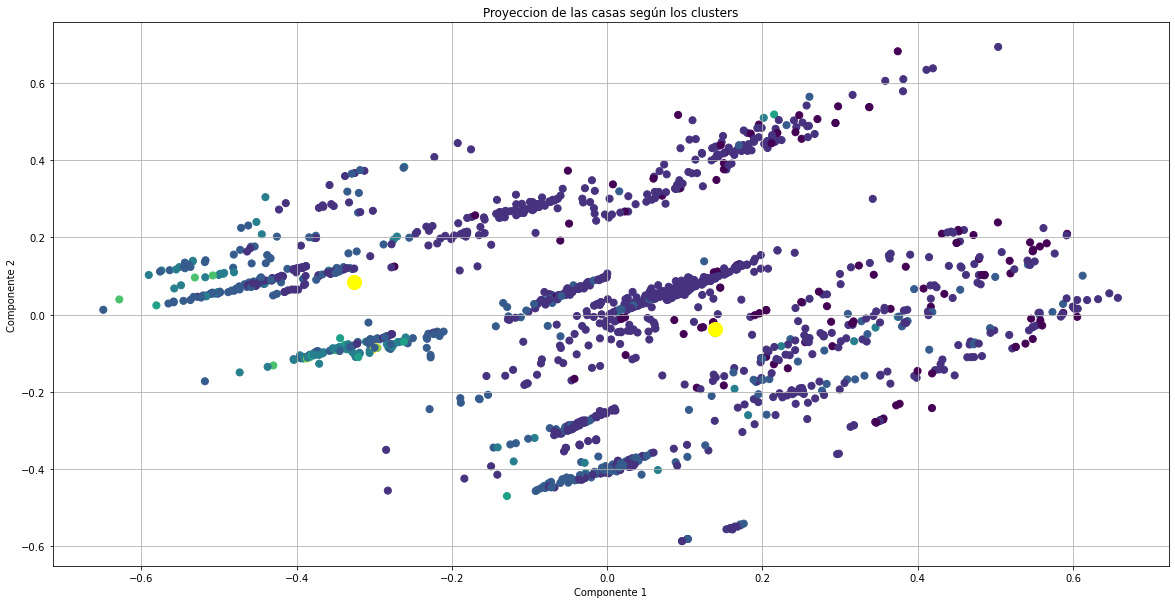

Pintando los valores para k= 3


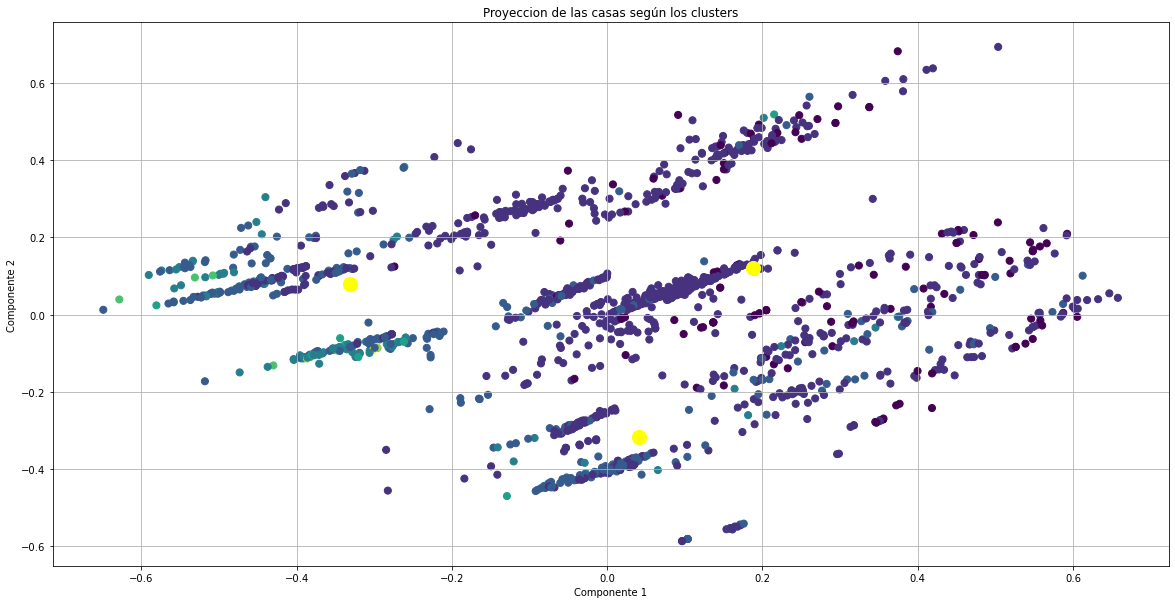

Pintando los valores para k= 4


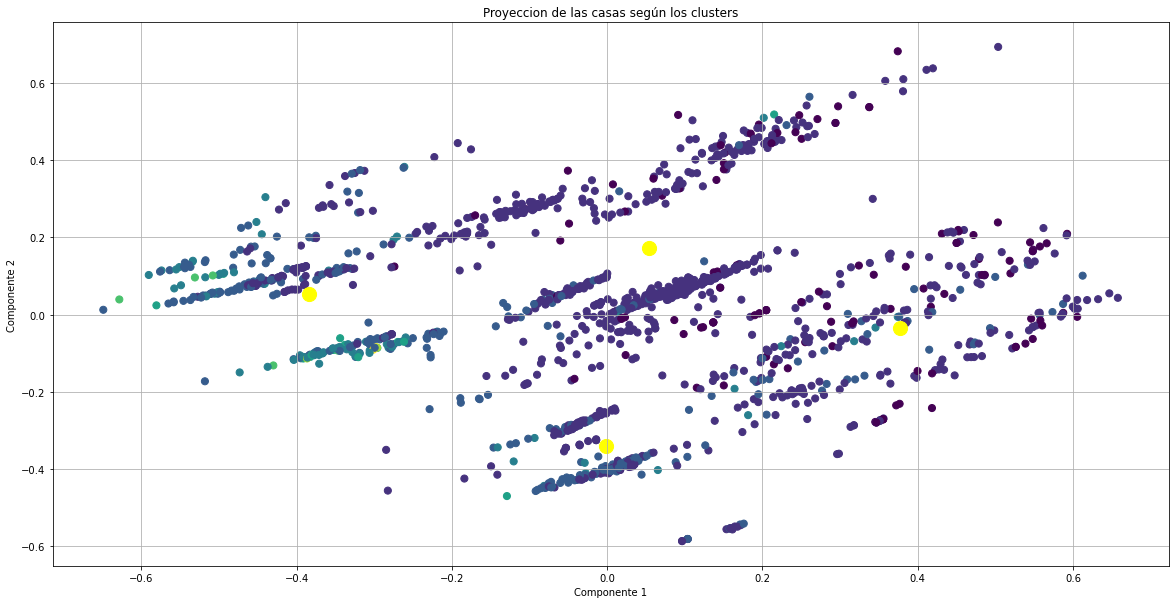

Pintando los valores para k= 5


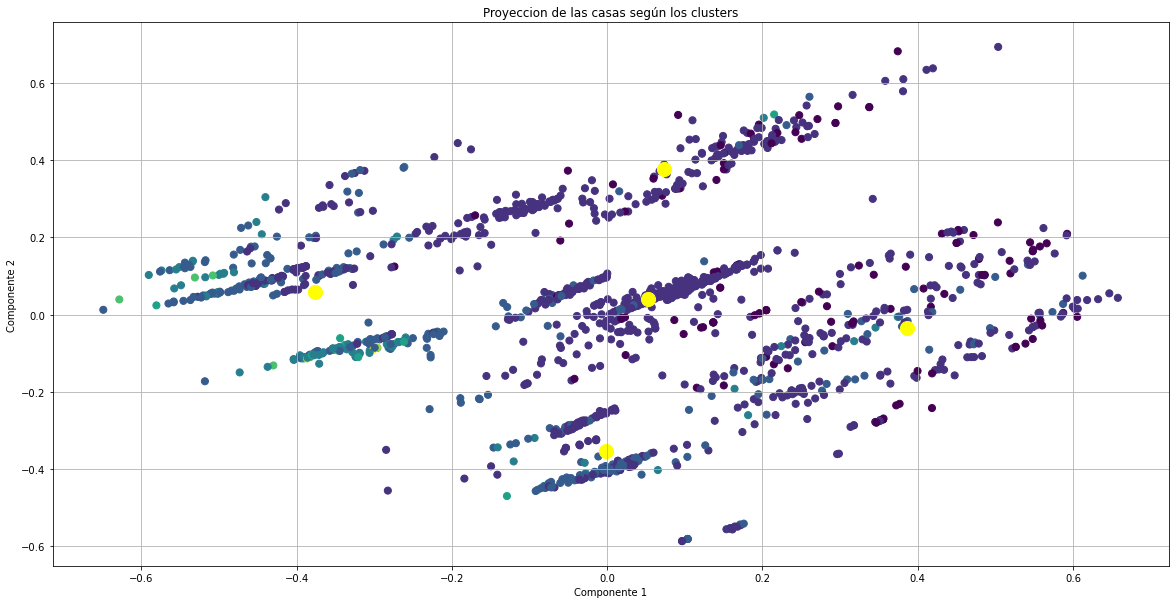

Pintando los valores para k= 6


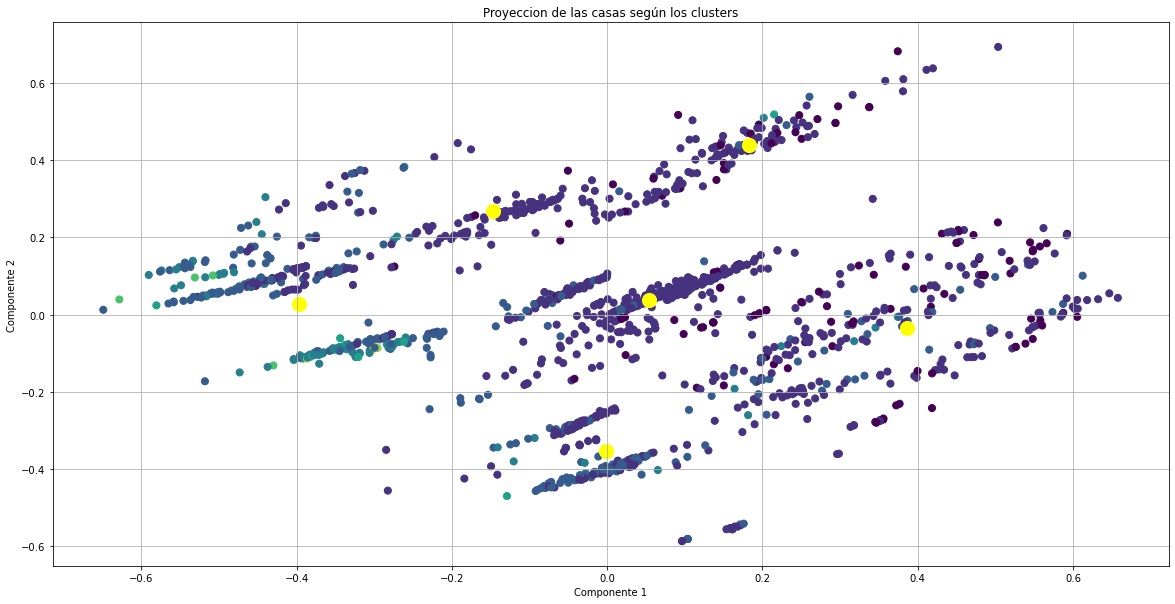

Pintando los valores para k= 7


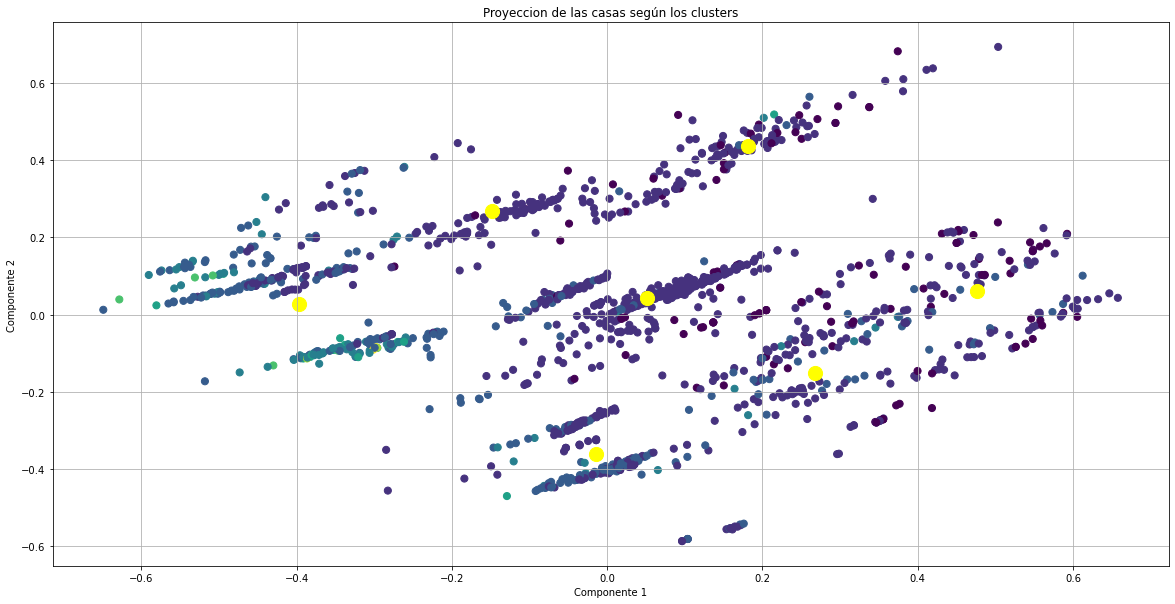

Pintando los valores para k= 8


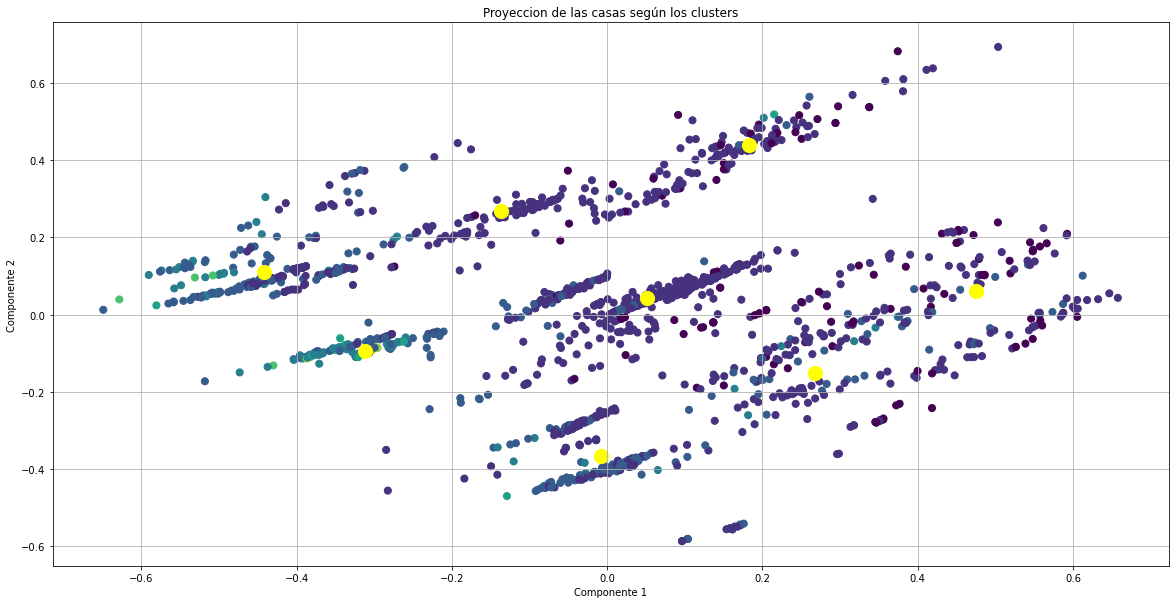

In [27]:
#Definimos el modelo a emplear, hemos dicho que 8 clusters, con k-means++
valoresReales = rangos
for i in range (2,9):

    # defining the kmeans function with initialization as k-means++ max_iter por defecto 300
    modelo = KMeans(n_clusters=i, init='k-means++', n_init=10, )

    # fitting the k means algorithm on scaled data
    modelo.fit(principalDf)
        
    #Situacion de los clusters
    clusters = modelo.cluster_centers_
    
    #Predecimos los valores
    predictedVals = modelo.fit_predict(principalDf)
    
    # inertia on the fitted data
    inercia = kmeans.inertia_
    etiquetas = kmeans.labels_
    iteraciones = kmeans.n_iter_
    
    #pintando los datos
    fig, ax = plt.subplots(figsize=(20, 10))
    print('Pintando los valores para k=',i)
    
    #Pinto los valores reales
    plt.scatter(principalDf['Componente 1'], principalDf['Componente 2'], c=valoresReales, s=50)
    
    #Pinto los valores de los clusters
    plt.scatter(clusters[:,0],clusters[:,1], c='yellow',s=200)
    
    plt.grid(True)
    plt.xlabel('Componente 1')
    plt.ylabel('Componente 2')
    plt.title('Proyeccion de las casas según los clusters')
    plt.show()

### Realmente entre 6, 7 y 8 clusters no hay una excesiva diferencia, y los clusters centrales son los que mejor ordenados están aunque el más centrado podemos ver que contiene puntos morados y azules. Los colores no ayudan en exceso a depurar y visualizar mejor pero podemos apreciar que la diferencia entre utilizar 6, 7 u 8 clusters no es excesivamente grande.

### También hay que mencionar que tenemos 8 variables diferentes a la hora de agrupar por lo que se puede estar produciendo lo que denominamos overfitting.

### 4) Estudia qué técnicas de postprocesamiento se podrían aplicar en base al error cometido en cada clúster (1 punto)

Las técnicas de postprocesamiento en clustering serían:
    <ul>
    <li>Eliminar los clusteres de posibles datos atípicos ya que se convertirían en clusteres outliers</li>
    <li>Dividir los clusteres dudosos con un alto SSE (Sum of Squared Error)</li>
    <li>Mezclas clusteres cercanos con un bajo SSE</li>
    </ul>

### Conclusiones

Trabajar con una alta dimensionalidad de datos para representarlos o clasificarlos no es para nada productivo. Ya nos pasó lo mismo en el laboratorio 1, donde tuvimos que reducir la dimensionalidad de los datos para poder agruparlos de manera correcta. Un buen modo de reducir la dimensionalidad de los datos es el PCA o Principal Component Analysis que nos permite reducir los datos de modo y manera que perdamos la menor cantidad de información posible.

Respecto a clusterizar, es un método de aprendizaje no supervisado por lo que realmente no necesitaríamos definir las clases a las que vamos a apuntar desde un principio, es decir, al contrario que en la clasificación por KNN donde si necesitamos definir una clase objetivo aquí no es necesario. Simplemente definiremos una serie de clusters con sus centroides y a partir de ellos iremos ajustando los datos.

Los clusters son los que determinan el número de clases que vamos a tener en nuestro conjunto de datos.